## Synapse Model - Advanced Usage

This notebook will exhibit some of the ways in which one can use the Simulation object to explore parameter space, test hypotheses and write custom routines. For simple use cases, such as exploration of only one parameter, using the script as indicated in the README.md file.

In [1]:
%matplotlib inline
import math
from synapse import i_o, utils

In [2]:
SIM = utils.Simulation(name='example')


Name : example
Running Model with Default Parameters...



In [3]:
print(SIM)


NAME : example

PARAMS :
stim_int	:	0.05
depletion_on	:	False
ca_ec50		:	0.7
a_tau		:	(0.001, 0.005)
ca_decay	:	0.05
num_syn		:	100
num_trials	:	300
pool_tau	:	1.0
quantal_size	:	-10
vesicle_prox	:	0.25
num_stim	:	2
num_cav_ratio	:	1
fs		:	20000.0
cav_p_open	:	0.83
num_cav		:	1
ca_coop		:	3.72
stim1_time	:	0.1
cav_i		:	1
sweep_length	:	1

Runs stored in DEFAULT_RUNS = 1

Runs stored in MOD_RUNS = 0



In [4]:
sim_runs,mod_dict = SIM.run_modulation()

Running Modulation of cav_p_open for range:
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

Run #1 with cav_p_open at 0.1 of default
Run #2 with cav_p_open at 0.2 of default
Run #3 with cav_p_open at 0.3 of default
Run #4 with cav_p_open at 0.4 of default
Run #5 with cav_p_open at 0.5 of default
Run #6 with cav_p_open at 0.6 of default
Run #7 with cav_p_open at 0.7 of default
Run #8 with cav_p_open at 0.8 of default
Run #9 with cav_p_open at 0.9 of default
Run #10 with cav_p_open at 1.0 of default

----
Storing sim_runs in mod_runs as
(sim_runs, mod_dict)
where mod_dict = {parameter:mod_range}

Done with Modulation of cav_p_open
----


In [5]:
print(SIM)


NAME : example

PARAMS :
stim_int	:	0.05
depletion_on	:	False
ca_ec50		:	0.7
a_tau		:	(0.001, 0.005)
ca_decay	:	0.05
num_syn		:	100
num_trials	:	300
pool_tau	:	1.0
quantal_size	:	-10
vesicle_prox	:	0.25
num_stim	:	2
num_cav_ratio	:	1
fs		:	20000.0
cav_p_open	:	0.83
num_cav		:	1
ca_coop		:	3.72
stim1_time	:	0.1
cav_i		:	1
sweep_length	:	1

Runs stored in DEFAULT_RUNS = 1

Runs stored in MOD_RUNS = 1



In [6]:
amp,ppr,cv,mean_epsc = SIM.run_analysis(sim_runs=SIM.mod_runs[-1][0])

Analysis Start:

Analyzing Run #1
Recreating Mean EPSC from Run #1
Analyzing Run #2
Recreating Mean EPSC from Run #2
Analyzing Run #3
Recreating Mean EPSC from Run #3
Analyzing Run #4
Recreating Mean EPSC from Run #4
Analyzing Run #5
Recreating Mean EPSC from Run #5
Analyzing Run #6
Recreating Mean EPSC from Run #6
Analyzing Run #7
Recreating Mean EPSC from Run #7
Analyzing Run #8
Recreating Mean EPSC from Run #8
Analyzing Run #9
Recreating Mean EPSC from Run #9
Analyzing Run #10
Recreating Mean EPSC from Run #10

Saving Plots to /Users/ken/Desktop/repos/synapseModel/session/example_plots/


**Now we will investigate subsets of traces or individual boutons.**

Note on layered indexing for SIM.mod_runs... [-1] is most recent modulation run, [0] refers to sim_run object (not params), mod_val is the point on the mod_range list we would like to access.

In [7]:
mod_run = SIM.mod_runs[-1][0]
mod_val = 9

ALL Modulation values of cav_p_open : 
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

We will work with :
cav_p_open = 1.0 of baseline value


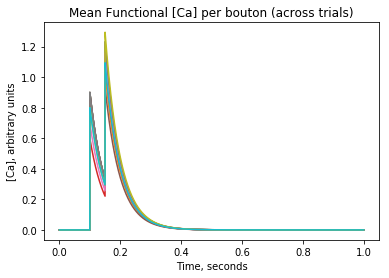

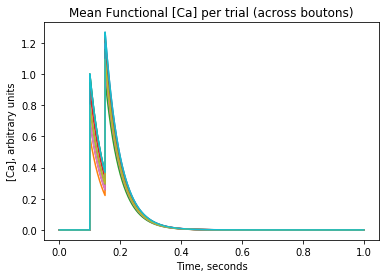

In [8]:
param = [(k,v[mod_val]) for k,v in SIM.mod_runs[-1][1].items()][0]
print("ALL Modulation values of {0} : ".format(param[0]))
print(SIM.mod_runs[-1][1][param[0]])
print("")
print("We will work with :")
print("{0} = {1} of baseline value".format(param[0],param[1]))
all_trials = [x for x in range(10)]
all_syn = [x for x in range(10)]
SIM.plot_I_ca_trace(sim_run=mod_run[mod_val],trace=all_trials,synapse=all_syn,average=True)

Now we can visualize the transformation of the [Ca] transient from a single bouton and trial into a probability of vesicle release via the Hill function.

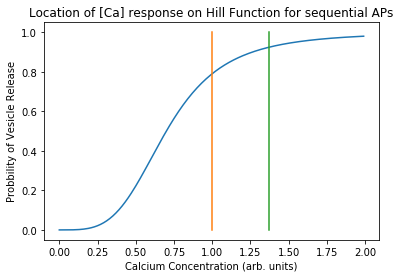

In [9]:
SIM.plot_hill_func(sim_run=mod_run[mod_val],trace=0,synapse=0,average=True)

We can now translate these probabilities into quantal content, generate resulting AMPA EPSCs and measure the mean resulting trace.

cav_p_open = 1.0 of baseline value


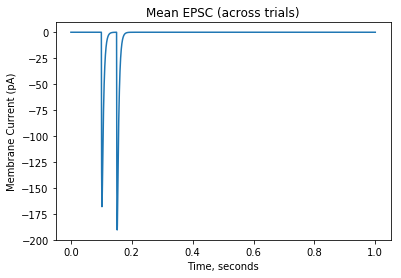

In [10]:
param = [(k,v[mod_val]) for k,v in SIM.mod_runs[-1][1].items()][0]
print("{0} = {1} of baseline value".format(param[0],param[1]))
Vm_t = SIM.plot_epsc_trace(sim_run=mod_run[mod_val],plot=True,average=True)

In [11]:
SIM.save()


Saving Simulation Object into session/example.pkl
